In [80]:
import os
import numpy as np
import pandas as pd; pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import seaborn as sns
sns.set() # Setting seaborn as default style even if use only matplotlib

In [81]:
def draw_NCAA_court(color='black', lw=2, gender='Men'):
    
    ax = plt.gca()

    # Drawing the various parts of an NCAA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value of 0.75 in our coordinate system
    hoop = Circle((25, 5.25), radius=0.75, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((22, 4), 6, 0, linewidth=lw, color=color)

    # The paint:
    # Create the outer box of the paint, width=12ft, height=19ft
    outer_box = Rectangle((19, 0), 12, 19, linewidth=lw, color=color, fill=False)

    # Create free throw top arc
    top_free_throw = Arc((25.05, 19), 12, 12, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    
    # Three point line
    # Create the side 3pt lines, they are 5ft long before they begin to arc
    corner_three_a = Rectangle((3.34375, 0), 0, 9.864583, linewidth=lw, color=color)
    corner_three_b = Rectangle((46.65625, 0), 0, 9.864583, linewidth=lw, color=color)
    three_arc = Arc((25, 5.25), 44.291667, 44.291667, theta1=12, theta2=168, linewidth=lw, color=color)

    # Center Court
    center_outer_arc = Circle((25, 47), radius=6, linewidth=lw, color=color, fill=False)

    # Draw the half court line, baseline and side out bound lines
    outer_lines1 = Rectangle((0, 0), 50, 47, linewidth=lw, color=color, fill=False)
    outer_lines2 = Rectangle((0, 47), 50, 47, linewidth=lw, color=color, fill=False)

    court_elements = [hoop, backboard, outer_box, top_free_throw, corner_three_a, corner_three_b, three_arc, center_outer_arc, outer_lines1, outer_lines2]
    
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    if gender=='Men':
        restricted = Arc((25, 5.25), 8, 8, theta1=0, theta2=180, linewidth=lw, color=color)
        corner_restricted_a = Rectangle((20.95, 4), 0, 1.25, linewidth=lw, color=color)
        corner_restricted_b = Rectangle((28.95, 4), 0, 1.25, linewidth=lw, color=color)
        court_elements.extend([restricted, corner_restricted_a, corner_restricted_b])

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [82]:
os.chdir('c:\\Users\\kavou\\OneDrive\\Έγγραφα\\Πρακτική - Μεταπτυχιακό\\MSA\\Courses\\CSE 6748\\LBA project\\Data')
os.getcwd()

'c:\\Users\\kavou\\OneDrive\\Έγγραφα\\Πρακτική - Μεταπτυχιακό\\MSA\\Courses\\CSE 6748\\LBA project\\Data'

In [83]:
games = pd.read_csv('NCAAM1 22-23 gamesdf.csv')
shots = pd.read_csv('NCAAM1 22-23 shotsdf.csv')
teams = pd.read_csv('NCAAM1 22-23 teamsdf.csv')

In [84]:
shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699566 entries, 0 to 699565
Data columns (total 33 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   game_id        699566 non-null  object 
 1   Team           699566 non-null  object 
 2   player         699566 non-null  object 
 3   shot_id        699566 non-null  object 
 4   Period         699566 non-null  int64  
 5   Time           699566 non-null  object 
 6   Time_Seconds   699566 non-null  int64  
 7   Stat           699566 non-null  object 
 8   Zone           699566 non-null  object 
 9   x_coordinate   699566 non-null  float64
 10  y_coordinate   699566 non-null  float64
 11  Angle          699566 non-null  float64
 12  Distance       699566 non-null  float64
 13  Score          699566 non-null  object 
 14  Jumpshot       699566 non-null  bool   
 15  Assisted       699566 non-null  bool   
 16  Red Zone       699566 non-null  bool   
 17  Floater        699566 non-nul

In [85]:
shots.describe()

,Period,Time_Seconds,x_coordinate,y_coordinate,Angle,Distance
count,699566.000000,699566.000000,699566.000000,699566.000000,699566.000000,699566.000000
mean,1.507124,595.657375,25.147133,14.345778,96.735614,13.523401
std,0.519551,348.223054,11.066295,8.683559,59.698602,9.885246
min,1.000000,0.000000,0.000000,0.000000,0.900000,0.390000
25%,1.000000,293.000000,21.000000,7.500000,54.600000,3.780000
50%,1.000000,598.000000,25.000000,10.300000,90.000000,11.480000
75%,2.000000,900.000000,29.000000,21.600000,130.100000,24.020000
max,6.000000,1200.000000,50.000000,92.100000,358.700000,88.050000


In [86]:
shots.insert(8, 'Type', shots.Stat.str[:-4])
shots.insert(9, 'Result', shots.Stat.str[-4:])
shots

,game_id,Team,player,shot_id,Period,Time,Time_Seconds,Stat,Type,Result,Zone,x_coordinate,y_coordinate,Angle,Distance,Score,Jumpshot,Assisted,Red Zone,Floater,Second Chance,Layup,Paint,Drive,Blocked,ATO,Off Turnover,Off Steal,Hook Shot,Fastbreak,Pullup,And1,Turnaround,Dunk,Step Back
0,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,618d6f44ed05764db467fe48,636a5fa6531336e79c3425dd,1,18:50,1130,ThreeMake,Three,Make,7-1,5.0,20.7,37.7,25.26,3 - 2,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,636a5d88531336e79c342589,636a5fa6531336e79c3425e1,1,18:11,1091,TwoMiss,Two,Miss,4-2,21.0,20.7,75.5,15.94,3 - 2,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,636a5d88531336e79c34258a,636a5fa6531336e79c3425e3,1,18:6,1086,TwoMiss,Two,Miss,3-1,14.0,11.3,28.7,12.54,3 - 2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,618d6f45ed05764db467fe4e,636a5fa6531336e79c3425e8,1,17:7,1027,TwoMiss,Two,Miss,3-2,25.0,16.9,90.0,11.67,3 - 4,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
4,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,636a5d88531336e79c342588,636a5fa6531336e79c3425ea,1,16:28,988,TwoMiss,Two,Miss,4-2,25.0,24.4,90.0,19.19,3 - 4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699561,648b3a9e98debb5769861e35,5e875e684dc25ebee5af6b7b,618dbab19a32a50e3d7afdc2,648b3a7b98debb5769861cdd,3,1:31,91,TwoMiss,Two,Miss,1,27.0,7.5,131.4,3.03,85 - 83,False,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False
699562,648b3a9e98debb5769861e35,5e875e684dc25ebee5af6b7b,618dbab09a32a50e3d7afdbb,648b3a7b98debb5769861ce0,3,0:37,37,TwoMiss,Two,Miss,4-2,26.0,20.7,93.7,15.46,87 - 83,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
699563,648b3a9e98debb5769861e35,5e875e684dc25ebee5af6b7b,618dbab19a32a50e3d7afdc6,648b3a7b98debb5769861ce2,3,0:35,35,TwoMake,Two,Make,1,25.5,7.5,102.4,2.32,87 - 85,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
699564,648b3a9e98debb5769861e35,5e875e684dc25ebee5af6b7b,618dbab19a32a50e3d7afdc2,648b3a7b98debb5769861ce4,3,0:11,11,TwoMiss,Two,Miss,1,24.0,9.4,76.5,4.27,88 - 85,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False


In [87]:
shots[shots.And1==True].Result.value_counts() #And1 column is True only when the shot is made (like Assisted)

Result
Make    16768
Name: count, dtype: int64

In [88]:
#Percentage of MADE shots that are assisted for every type of shot
features = ['Jumpshot', 'Red Zone', 'Floater', 'Second Chance', 'Layup', 'Paint', 'Drive', 'ATO',
 'Off Turnover', 'Off Steal', 'Hook Shot', 'Fastbreak', 'Pullup', 'And1', 'Turnaround', 'Dunk', 'Step Back']
for col in features:
    print(col,round(shots[(shots.Result=='Make')&(shots[col]==True)].Assisted.mean(),3))

Jumpshot 0.718
Red Zone 0.582
Floater 0.207
Second Chance 0.311
Layup 0.376
Paint 0.4
Drive 0.186
ATO 0.545
Off Turnover 0.504
Off Steal 0.52
Hook Shot 0.326
Fastbreak 0.587
Pullup 0.213
And1 0.363
Turnaround 0.196
Dunk 0.714
Step Back 0.132


In [89]:
#calculate shot accuracy per zone
accuracy_df = shots[['Zone', 'Result']]
accuracy_df.Result = np.where(accuracy_df.Result=='Miss',0,1)
accuracy_df.groupby('Zone').mean()

C:\Users\kavou\AppData\Local\Temp\ipykernel_34360\2297775288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accuracy_df.Result = np.where(accuracy_df.Result=='Miss',0,1)


,Result
Zone,
1,0.615806
2-1,0.379749
2-2,0.417858
2-3,0.357068
3-1,0.345635
3-2,0.373291
3-3,0.342130
4-1,0.355377
4-2,0.369571


In [90]:
category_df = shots.copy()
category_df.insert(16, 'Category', 'Other')
category_df.Category = np.where(category_df.Jumpshot==True, 'Jumpshot', category_df.Category)
category_df.Category = np.where(category_df.Floater==True, 'Floater', category_df.Category)
category_df.Category = np.where(category_df.Layup==True, 'Layup', category_df.Category)
category_df.Category = np.where(category_df.Dunk==True, 'Dunk', category_df.Category)
category_df.Category = np.where(category_df.Pullup==True, 'Pullup', category_df.Category)
category_df.Category = np.where(category_df.Turnaround==True, 'Turnaround', category_df.Category)
category_df.Category = np.where(category_df['Hook Shot']==True, 'Hook Shot', category_df.Category)
category_df.Category = np.where(category_df['Step Back']==True, 'Step Back', category_df.Category)
category_df.Category.value_counts()

Category
Jumpshot      355118
Layup         233745
Pullup         28861
Dunk           23436
Floater        16052
Hook Shot      14866
Turnaround     13948
Step Back      10700
Other           2840
Name: count, dtype: int64

In [91]:
category_df = category_df.drop(['Jumpshot','Floater','Layup','Dunk','Pullup','Turnaround','Hook Shot','Step Back'], axis=1)
category_df

,game_id,Team,player,shot_id,Period,Time,Time_Seconds,Stat,Type,Result,Zone,x_coordinate,y_coordinate,Angle,Distance,Score,Category,Assisted,Red Zone,Second Chance,Paint,Drive,Blocked,ATO,Off Turnover,Off Steal,Fastbreak,And1
0,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,618d6f44ed05764db467fe48,636a5fa6531336e79c3425dd,1,18:50,1130,ThreeMake,Three,Make,7-1,5.0,20.7,37.7,25.26,3 - 2,Jumpshot,True,False,False,False,False,False,False,False,False,False,False
1,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,636a5d88531336e79c342589,636a5fa6531336e79c3425e1,1,18:11,1091,TwoMiss,Two,Miss,4-2,21.0,20.7,75.5,15.94,3 - 2,Floater,False,True,False,False,False,False,False,False,False,False,False
2,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,636a5d88531336e79c34258a,636a5fa6531336e79c3425e3,1,18:6,1086,TwoMiss,Two,Miss,3-1,14.0,11.3,28.7,12.54,3 - 2,Jumpshot,False,False,True,False,False,False,False,False,False,False,False
3,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,618d6f45ed05764db467fe4e,636a5fa6531336e79c3425e8,1,17:7,1027,TwoMiss,Two,Miss,3-2,25.0,16.9,90.0,11.67,3 - 4,Layup,False,False,False,True,True,False,False,False,False,False,False
4,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,636a5d88531336e79c342588,636a5fa6531336e79c3425ea,1,16:28,988,TwoMiss,Two,Miss,4-2,25.0,24.4,90.0,19.19,3 - 4,Jumpshot,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699561,648b3a9e98debb5769861e35,5e875e684dc25ebee5af6b7b,618dbab19a32a50e3d7afdc2,648b3a7b98debb5769861cdd,3,1:31,91,TwoMiss,Two,Miss,1,27.0,7.5,131.4,3.03,85 - 83,Layup,False,True,False,True,False,True,False,False,False,False,False
699562,648b3a9e98debb5769861e35,5e875e684dc25ebee5af6b7b,618dbab09a32a50e3d7afdbb,648b3a7b98debb5769861ce0,3,0:37,37,TwoMiss,Two,Miss,4-2,26.0,20.7,93.7,15.46,87 - 83,Jumpshot,False,False,False,False,False,False,False,False,False,False,False
699563,648b3a9e98debb5769861e35,5e875e684dc25ebee5af6b7b,618dbab19a32a50e3d7afdc6,648b3a7b98debb5769861ce2,3,0:35,35,TwoMake,Two,Make,1,25.5,7.5,102.4,2.32,87 - 85,Layup,False,False,True,True,False,False,False,False,False,False,False
699564,648b3a9e98debb5769861e35,5e875e684dc25ebee5af6b7b,618dbab19a32a50e3d7afdc2,648b3a7b98debb5769861ce4,3,0:11,11,TwoMiss,Two,Miss,1,24.0,9.4,76.5,4.27,88 - 85,Layup,False,False,False,True,False,True,False,False,False,False,False


In [92]:
#Number of 3s per zone
shots[shots.Type=='Three'].Zone.value_counts().sort_index()

Zone
 5-1    16208
 5-2    31770
 6-1    29689
 6-2    57380
 6-3    32266
 7-1    11457
 7-2    70782
 7-3    13023
Name: count, dtype: int64

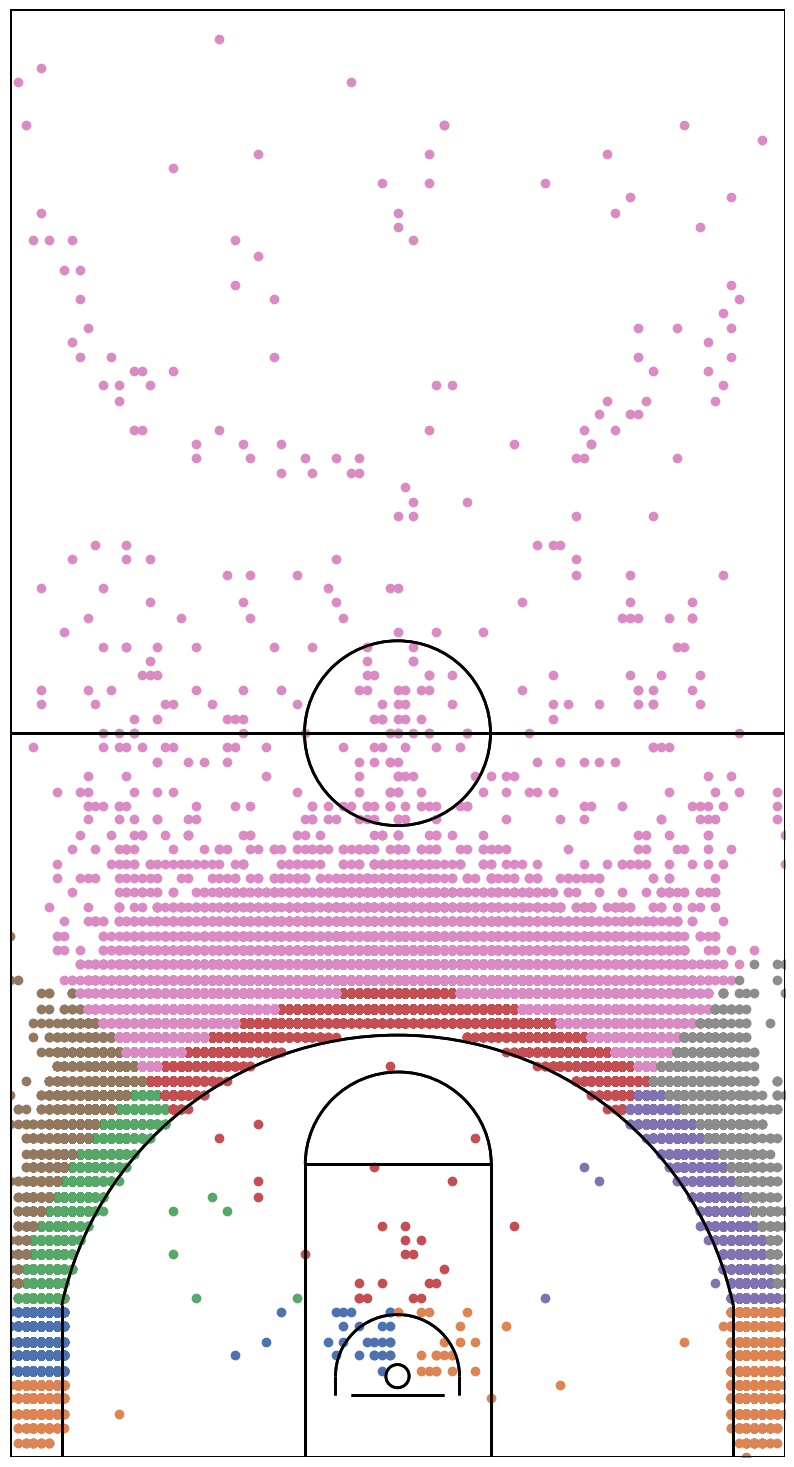

In [93]:
#Plot 3point shots
plt.figure(figsize=(10,18.8))

draw_NCAA_court()

for zone in sorted(shots.Zone.unique())[10:]:
    plt.scatter(shots[shots.Zone==zone].x_coordinate, shots[shots.Zone==zone].y_coordinate)

draw_NCAA_court()

plt.xlim(0,50)
plt.ylim(0,94)
plt.axis('off')
plt.show()

In [94]:
#Number of 2s per zone
shots[shots.Type!='Three'].Zone.value_counts().sort_index()

Zone
 1      224595
 2-1     20927
 2-2     69909
 2-3     17232
 3-1     12979
 3-2     29982
 3-3     11671
 4-1      9103
 4-2     32140
 4-3      8453
Name: count, dtype: int64

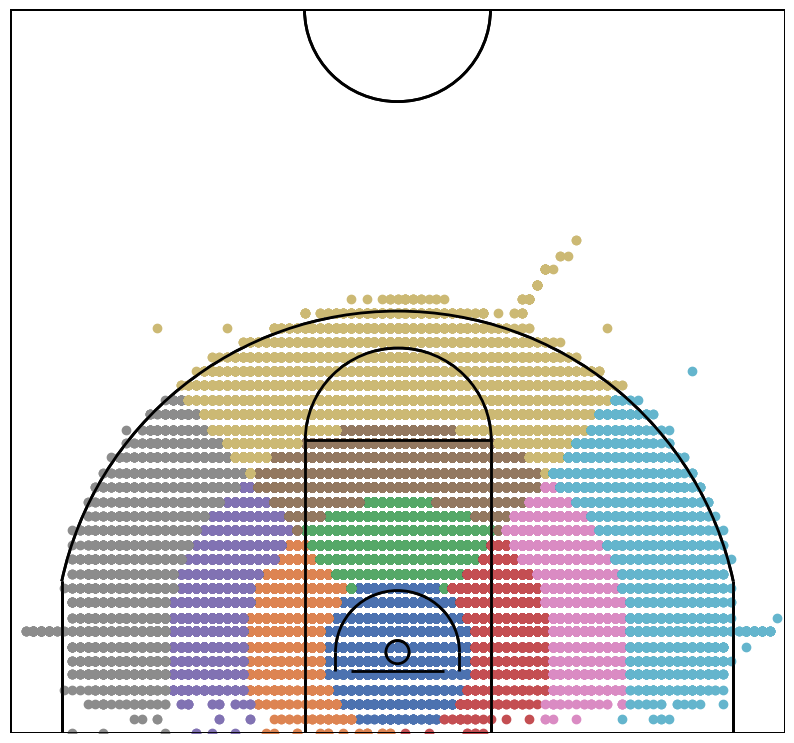

In [95]:
#Plot 2point shots
plt.figure(figsize=(10,9.4))

draw_NCAA_court()

for zone in sorted(shots.Zone.unique())[:10]:
    plt.scatter(shots[shots.Zone==zone].x_coordinate, shots[shots.Zone==zone].y_coordinate)

draw_NCAA_court()

plt.xlim(0,50)
plt.ylim(0,47)
plt.axis('off')
plt.show()

In [96]:
range_df = shots[['Zone', 'x_coordinate', 'y_coordinate', 'Angle', 'Distance']]
max_range_df = range_df.groupby('Zone').agg({'x_coordinate': 'max', 'y_coordinate': 'max', 'Angle': 'max', 'Distance': 'max'})
min_range_df = range_df.groupby('Zone').agg({'x_coordinate':'min', 'y_coordinate':'min', 'Angle':'min', 'Distance':'min',})
pd.merge(max_range_df, min_range_df, on='Zone', suffixes=('_max', '_min')).sort_index(axis=1)

,Angle_max,Angle_min,Distance_max,Distance_min,x_coordinate_max,x_coordinate_min,y_coordinate_max,y_coordinate_min
Zone,,,,,,,,
1,353.0,5.0,4.98,0.39,29.5,20.5,9.4,0.9
2-1,356.7,2.4,9.99,5.02,24.5,15.5,12.2,0.0
2-2,129.7,50.3,9.99,5.09,31.0,19.0,15.0,9.4
2-3,264.6,130.1,9.91,5.02,34.5,25.5,12.2,0.0
3-1,357.8,1.5,14.91,10.01,18.0,10.5,16.0,0.0
3-2,130.0,50.0,14.93,10.10,34.0,16.0,19.7,13.2
3-3,204.4,130.3,14.91,10.01,39.5,32.0,16.0,0.9
4-1,358.5,1.1,24.04,15.01,15.0,1.0,21.6,0.0
4-2,130.0,50.2,86.14,15.03,43.0,4.0,90.2,16.9


Text(0.5, 1.0, 'y_coordinate strip plot')

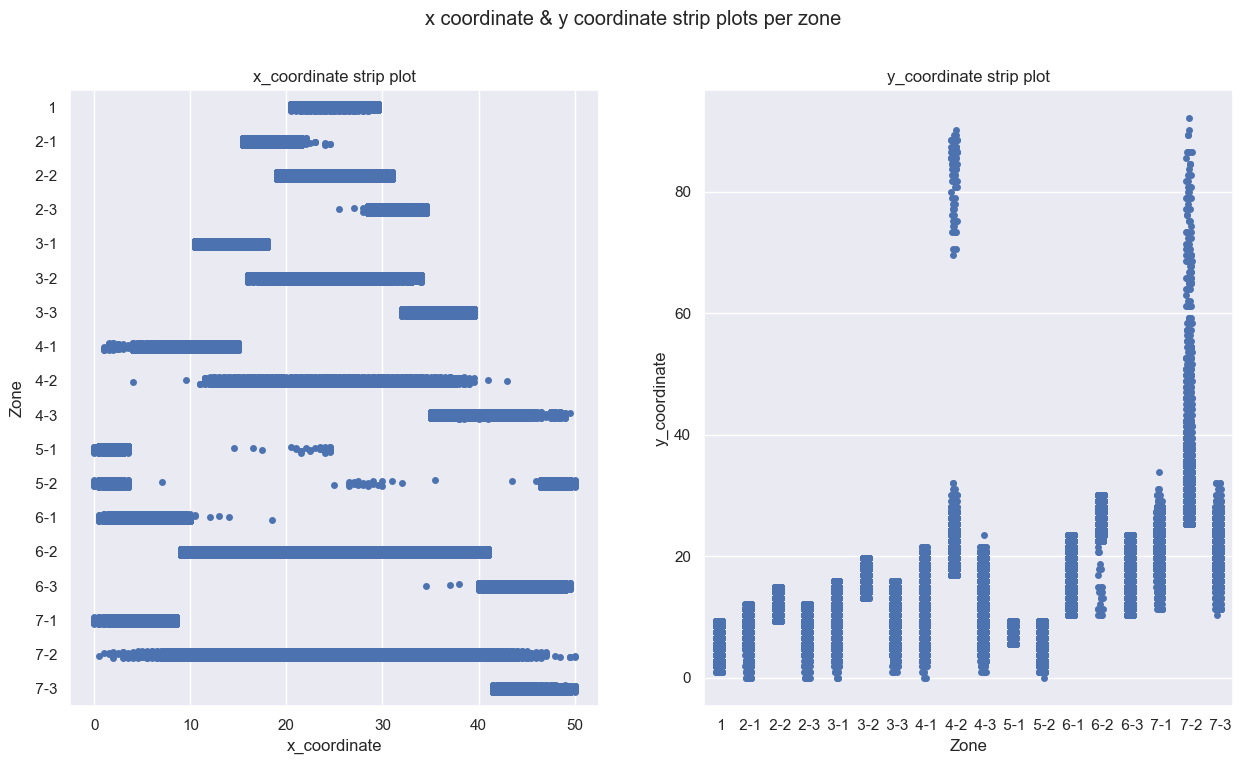

In [97]:
xy_df = shots[['Zone', 'x_coordinate', 'y_coordinate']].sort_values('Zone')

fig, axes = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle('x coordinate & y coordinate strip plots per zone')

sns.stripplot(ax=axes[0], x=xy_df.x_coordinate, y=xy_df.Zone, data=xy_df)
axes[0].set_title('x_coordinate strip plot')

sns.stripplot(ax=axes[1], y=xy_df.y_coordinate, x=xy_df.Zone, data=xy_df)
axes[1].set_title('y_coordinate strip plot')



<Axes: xlabel='Distance', ylabel='Zone'>

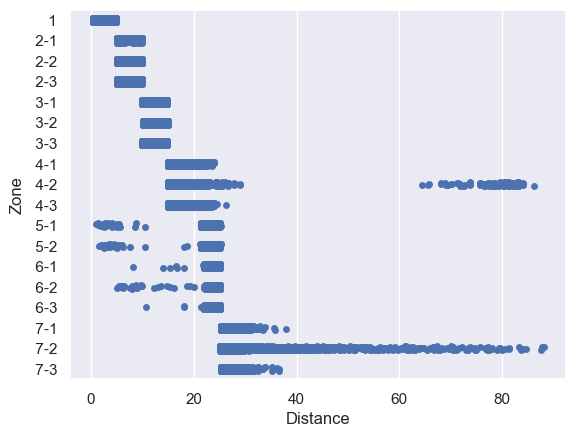

In [98]:
distance_df = shots[['Zone', 'Distance']].sort_values('Zone')

sns.stripplot(x=distance_df.Distance, y=distance_df.Zone, data=distance_df)

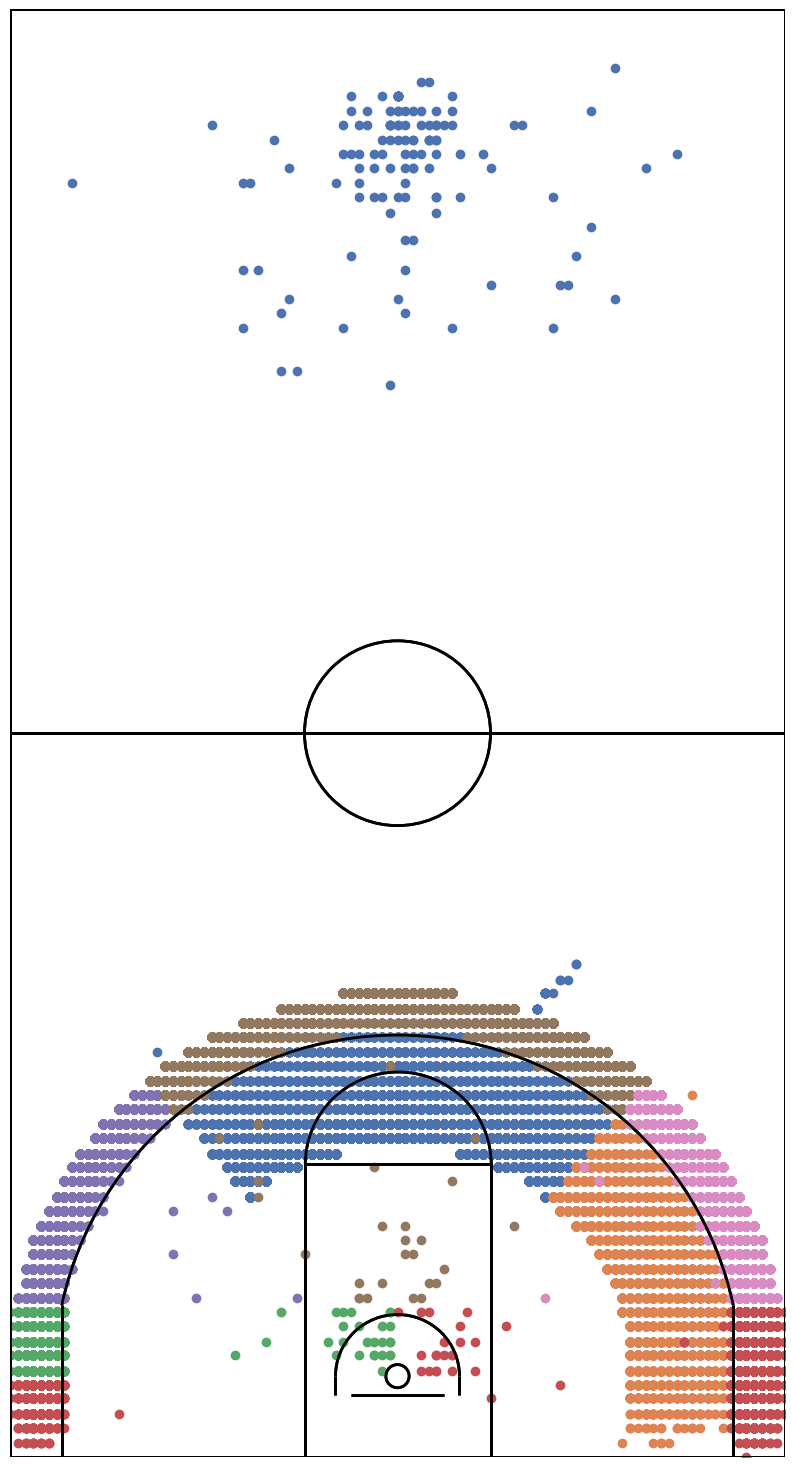

In [99]:
#Some zones contain misclasified shots! (4-2, 4-3, 5-1, 5-2, 6-1, 6-2, 6-3)
plt.figure(figsize=(10,18.8))

draw_NCAA_court()

for zone in sorted(shots.Zone.unique())[8:-3]:
    plt.scatter(shots[shots.Zone==zone].x_coordinate, shots[shots.Zone==zone].y_coordinate)

draw_NCAA_court()

plt.xlim(0,50)
plt.ylim(0,94)
plt.axis('off')
plt.show()

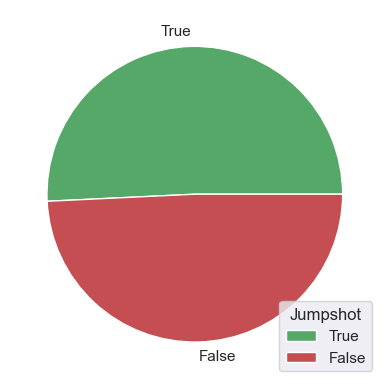

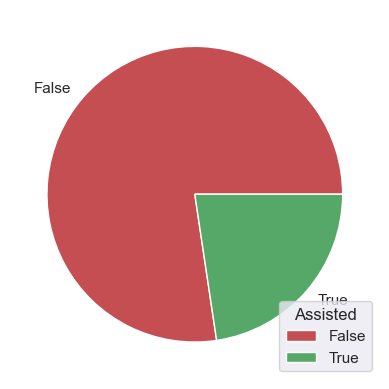

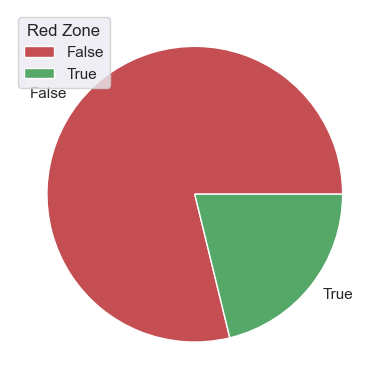

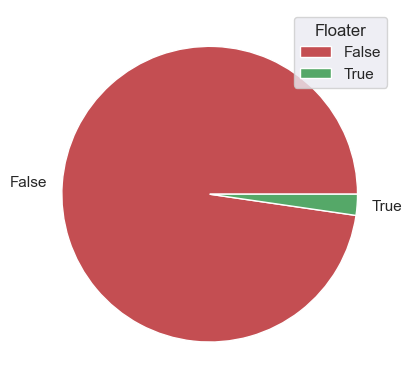

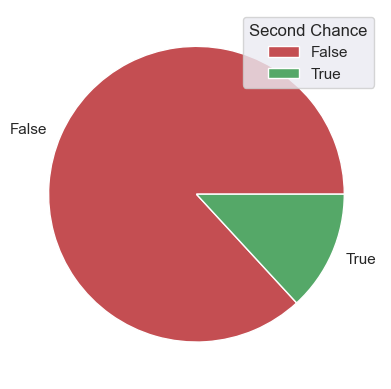

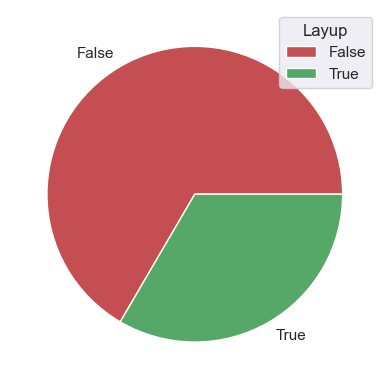

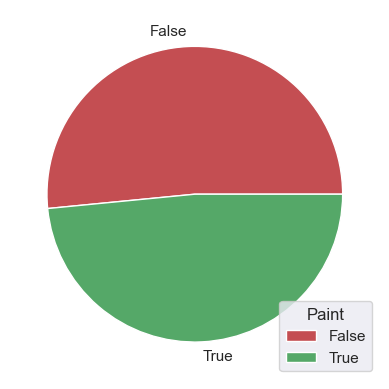

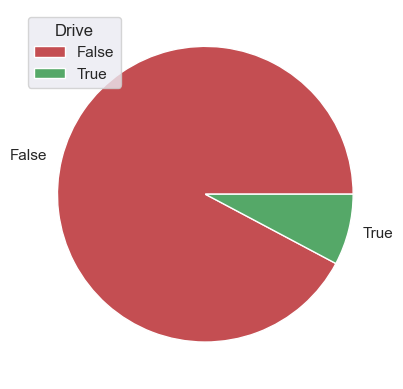

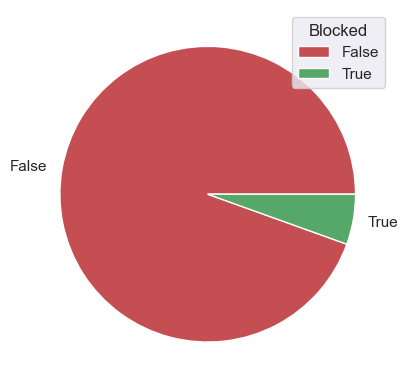

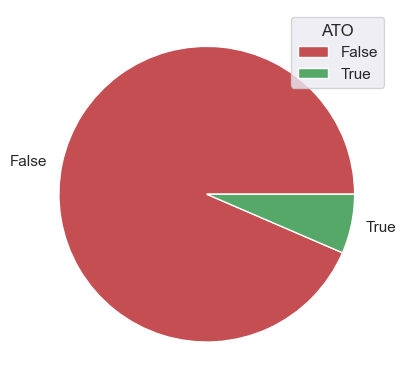

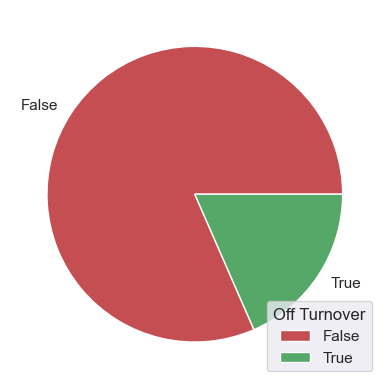

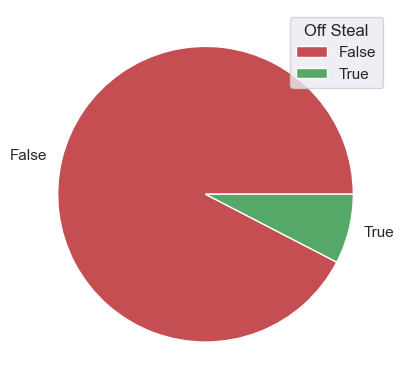

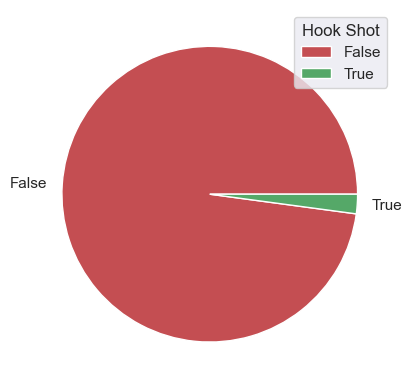

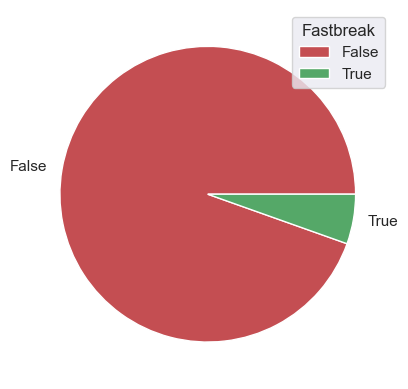

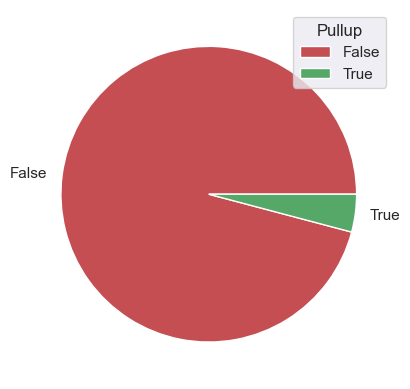

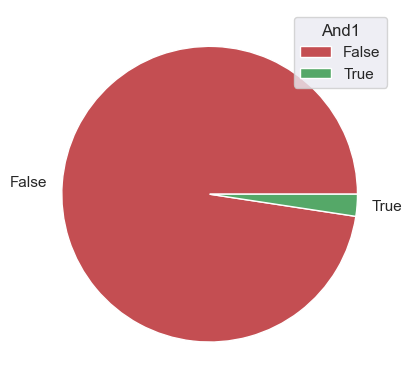

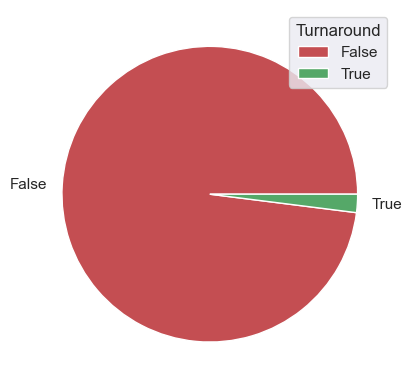

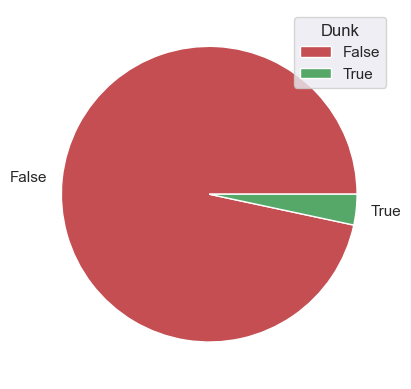

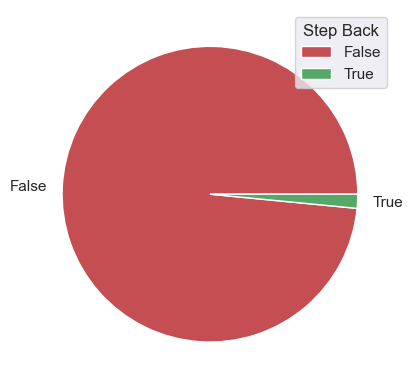

In [100]:
for col in shots.columns.to_list()[16:]:
    plt.pie(shots[col].value_counts(), labels=shots[col].value_counts().reset_index().iloc[:,0], colors = ['r','g'] if shots[col].value_counts().reset_index().iloc[0,0]==False else ['g','r'])
    plt.legend(title = col)
    plt.show()   